In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt   
import numpy as np    


%matplotlib inline

In [2]:
#labels = [["c{0}p".format(i),"c{0}n".format(i),"c{0}p=c{0}n".format(i)] for i in range(1,16)]

masses = [5,10,50,200,500]
isotopes = [128,129,130,131,132,134,136]
isotope_presence = [1.910/100,26.401/100,4.071/100,21.232/100,26.909/100,10.436/100,8.857/100] #percentage
col_names=['ER']
col_names.extend(['dRdEM'+str(masses[i])+'GeV' for i in range (0,len(masses))])
#print (labels)
# original exposure, needed so we can rescale results for some different exposure 
orig_exposure = 1250.*278.87 # 1.25ton* 278.87days in kilogram.days

In [3]:
spectra_low_iso=[]
spectra_high_iso = []
spectra_tot_iso = []
print(type(spectra_low_iso))
for i in range(len(isotopes)):
    #print (i,isotopes[i])
    spectra_low_iso.append(pd.read_csv('/home/cristian/EFT/EFT_tools/DMFormFactor_180403/Xe%d/Xe%d_NR_lowE_c4p=c4n.dat' %(isotopes[i],isotopes[i]) ,sep='\t',header=None,names=col_names))
    spectra_high_iso.append(pd.read_csv('/home/cristian/EFT/EFT_tools/DMFormFactor_180403/Xe%d/Xe%d_NR_highE_c4p=c4n.dat' %(isotopes[i],isotopes[i]), sep='\t',header=None,names=col_names))    
    spectra_tot_iso.append(pd.concat([spectra_low_iso[i],spectra_high_iso[i]]))
average_spectra=pd.DataFrame(columns=col_names)

print(np.array(spectra_tot_iso[0]['dRdEM5GeV'])[0])
a=np.array([spectra_tot_iso[j]['dRdEM5GeV'][1] for j in range(len(isotopes))])
print(np.array(spectra_tot_iso[0]['dRdEM5GeV'][1]))
for i in range(len(spectra_tot_iso[0]['ER'])):
    average_spectra.loc[i] = [np.array(spectra_tot_iso[0]['ER'])[i] , 
                              np.average([np.array(spectra_tot_iso[j]['dRdEM5GeV'])[i] for j in range(len(isotopes))],weights=isotope_presence),
                              np.average([np.array(spectra_tot_iso[j]['dRdEM10GeV'])[i] for j in range(len(isotopes))],weights=isotope_presence),
                              np.average([np.array(spectra_tot_iso[j]['dRdEM50GeV'])[i] for j in range(len(isotopes))],weights=isotope_presence),
                              np.average([np.array(spectra_tot_iso[j]['dRdEM200GeV'])[i] for j in range(len(isotopes))],weights=isotope_presence),
                              np.average([np.array(spectra_tot_iso[j]['dRdEM500GeV'])[i] for j in range(len(isotopes))],weights=isotope_presence)]

#average_spectra=np.array(average_spectra)
#print(average_spectra)

<class 'list'>
0.0
[ 0.  0.]
           ER  dRdEM5GeV  dRdEM10GeV  dRdEM50GeV  dRdEM200GeV   dRdEM500GeV
0        0.05   0.025062    0.013729    0.002832     0.000709  2.837630e-04
1        0.10   0.021963    0.013236    0.002817     0.000707  2.828178e-04
2        0.15   0.019170    0.012757    0.002802     0.000704  2.818758e-04
3        0.20   0.016669    0.012291    0.002788     0.000702  2.809369e-04
4        0.25   0.014445    0.011838    0.002773     0.000699  2.800013e-04
5        0.30   0.012478    0.011398    0.002758     0.000697  2.790688e-04
6        0.35   0.010745    0.010971    0.002744     0.000694  2.781395e-04
7        0.40   0.009227    0.010557    0.002729     0.000692  2.772133e-04
8        0.45   0.007903    0.010156    0.002715     0.000689  2.762902e-04
9        0.50   0.006751    0.009767    0.002700     0.000687  2.753703e-04
10       0.55   0.005752    0.009390    0.002686     0.000685  2.744534e-04
11       0.60   0.004889    0.009026    0.002672     0.0006

In [23]:
#spectra_low = pd.read_csv('/home/cristian/EFT/EFT_tools/DMFormFactor_180403/Xe131/Xe131_NR_lowE_c4p=c4n.dat',sep='\t',header=None,names=col_names)
#spectra_high= pd.read_csv('/home/cristian/EFT/EFT_tools/DMFormFactor_180403/Xe131/Xe131_NR_highE_c4p=c4n.dat', sep='\t',header=None,names=col_names)    

In [53]:
#print(spectra_low)

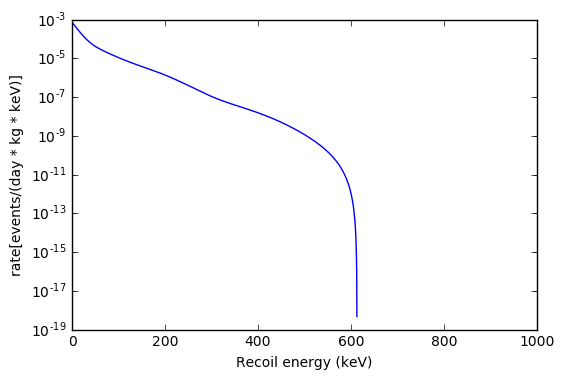

In [10]:

plt.plot(average_spectra.ER  ,    average_spectra.dRdEM200GeV)
#plt.plot(scaled_spectrum["ER"], 10*scaled_spectrum["dRdE"])
#plt.plot(scaled_spectrum["ER"],100*scaled_spectrum["dRdE"])
plt.xlabel("Recoil energy (keV)")
plt.ylabel("rate[events/(day * kg * keV)]")
plt.semilogy()
#plt.title()
plt.show()

In [55]:
import blueice as bi
from laidbax import base_model

In [56]:
m = bi.Model(base_model.config)

In [57]:
def model_summary(m):
    return pd.DataFrame(dict(name=[s.name for s in m.sources],
                             expected_events=m.expected_events()))

model_summary(m)

,expected_events,name
0,61.852142,er
1,0.000849,cnns
2,0.058525,radiogenics
3,0.220000,ac
4,0.520000,wall
5,0.090004,anomalous
6,18.316794,wimp


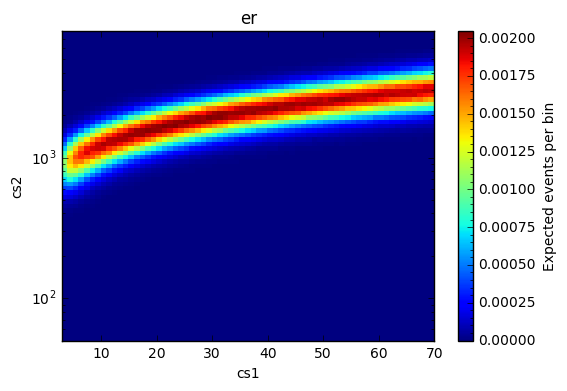

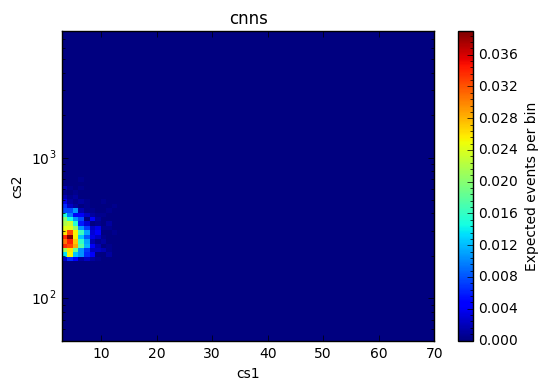

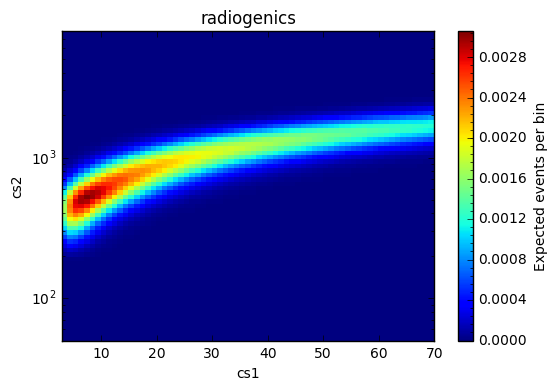

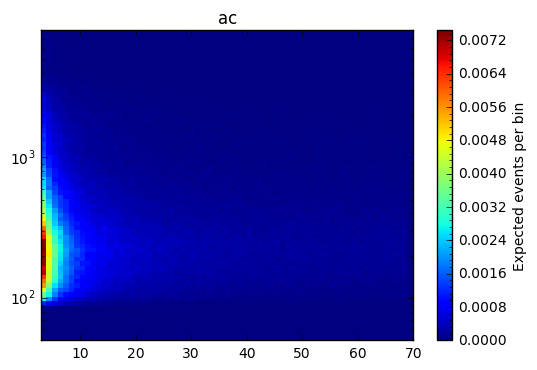

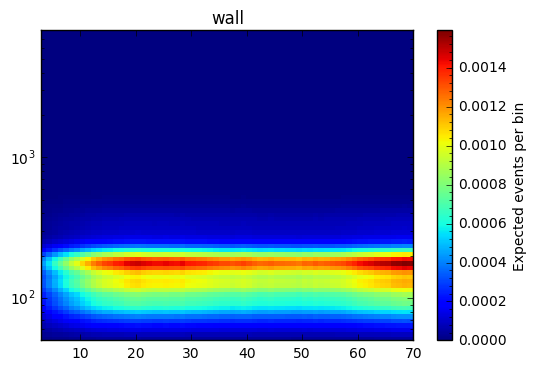

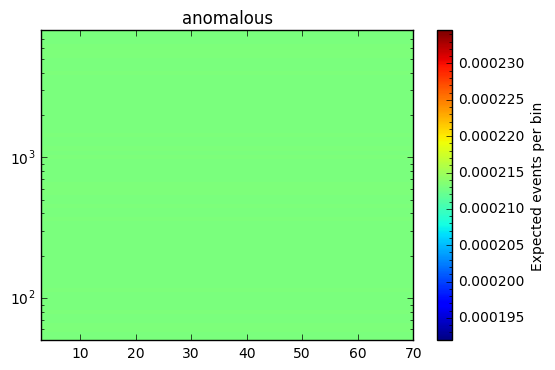

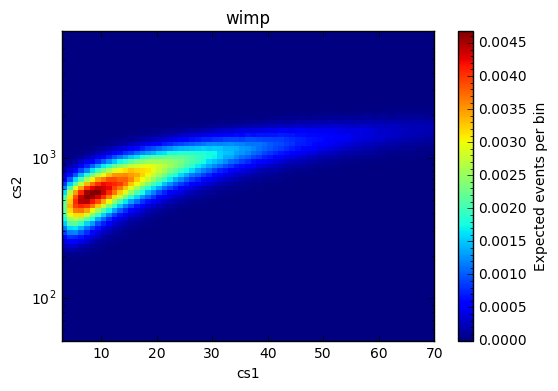

In [58]:
def plot_model(m):
    for s in m.sources:
        pdf = s._pdf_histogram
        events_per_bin = pdf * pdf.bin_volumes()
        events_per_bin.plot(cblabel='Expected events per bin')

        plt.title(s.name)
        plt.yscale('log')
        plt.show()
        
plot_model(m)

In [59]:
source_config = {
    'energy_distribution': (result.ER, result.M50GeV),
    'name': 'SD50',
    'label': 'SD',
    'recoil_type': 'nr',
    'color': 'black',
    # The amount of events to simulate to create the PDF
    # Depending on how important deep tails are for your model, you may want
    # to increase this from the default of 1e6.
    'n_events_for_pdf': 1e6,
    # This tells blueice which settings are irrelevant for the source.
    # Since it's an NR source, this includes all the ER parameters.
    # It helps blueice's caching to know which settings cannot change the model.
    # However, if you just want the nominal models and/or don't care about a small
    # slowdown, this can be safely ignored.
    'extra_dont_hash_settings': base_model.nr_ignore_settings}



In [60]:
from copy import deepcopy
new_config = deepcopy(base_model.config)

In [61]:
new_config['sources'][-1] = source_config
m2 = bi.Model(new_config)

In [62]:
model_summary(m2)

,expected_events,name
0,61.852142,er
1,0.000849,cnns
2,0.058525,radiogenics
3,0.220000,ac
4,0.520000,wall
5,0.090004,anomalous
6,567.135969,SD50


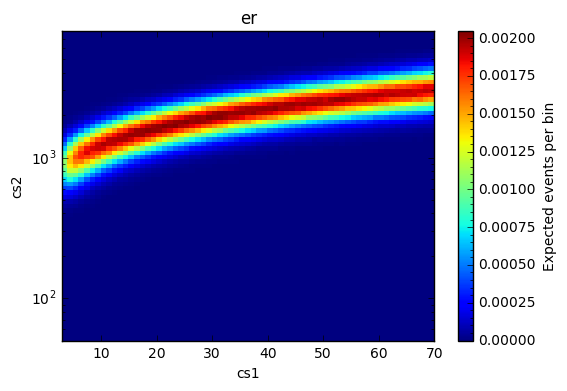

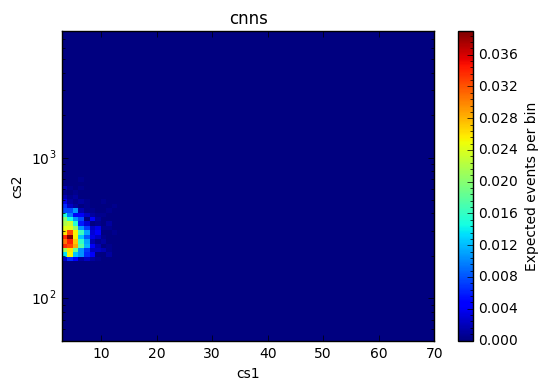

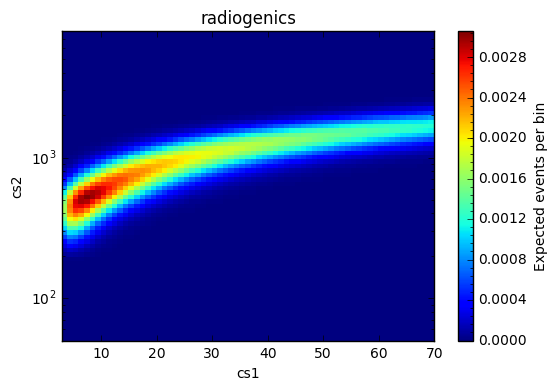

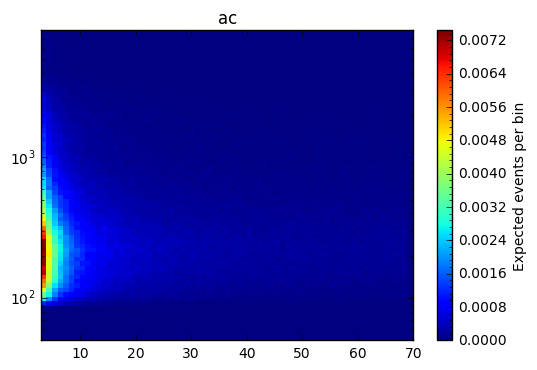

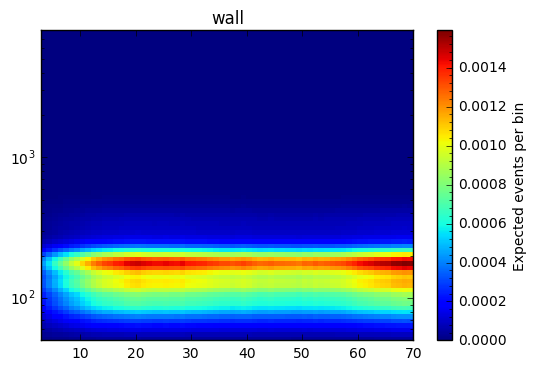

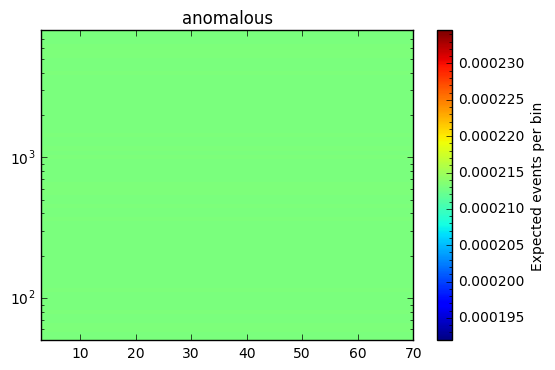

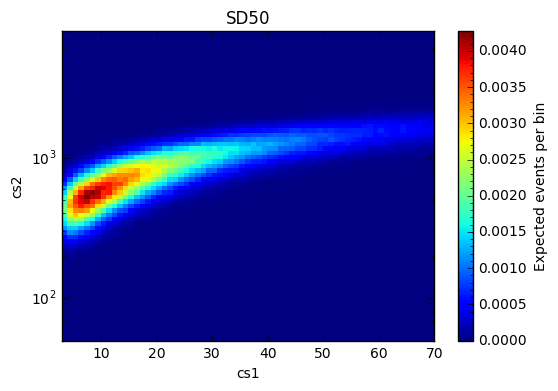

In [63]:
plot_model(m2)